# Change input shape dimensions for fine-tuning with Keras
## https://www.pyimagesearch.com/2019/06/24/change-input-shape-dimensions-for-fine-tuning-with-keras/

### local env: py3cv4tf1tor

<font color='magenta'>  
### Colab data dir: AEROROBOT:: '/content/drive/My Drive/Colab Notebooks/data/dogs_vs_cats_small/


In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
root_dir = '/content/drive/My Drive/Colab Notebooks/'

In [0]:
import os
os.chdir(root_dir)
proj_dir = os.path.join(root_dir, 'pyimage-kerasinputshape')
data_dir= os.path.join(proj_dir, 'data')

In [0]:
proj_dir
os.chdir(proj_dir)

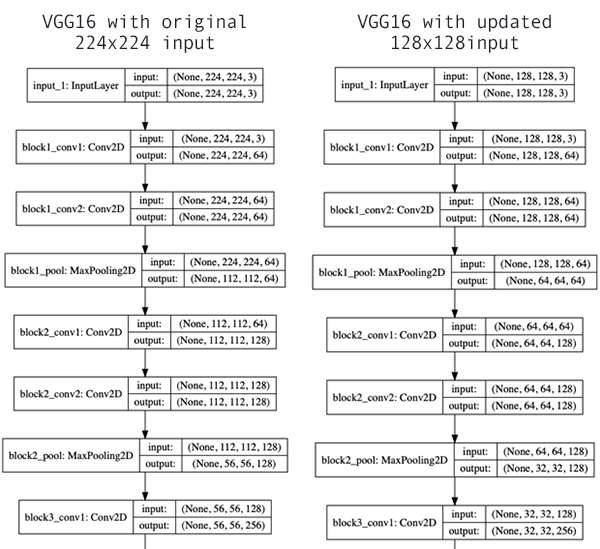

In [0]:
from IPython.display import Image
Image(os.path.join(proj_dir, 'keras_input_shape_networks.png'))

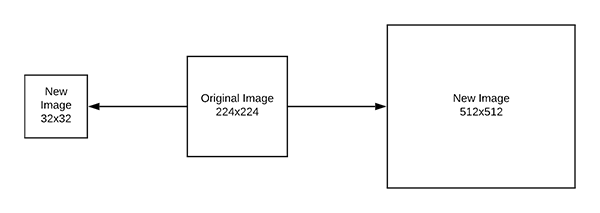

In [0]:
Image(os.path.join(proj_dir,'keras_input_shape_sizes.png'))

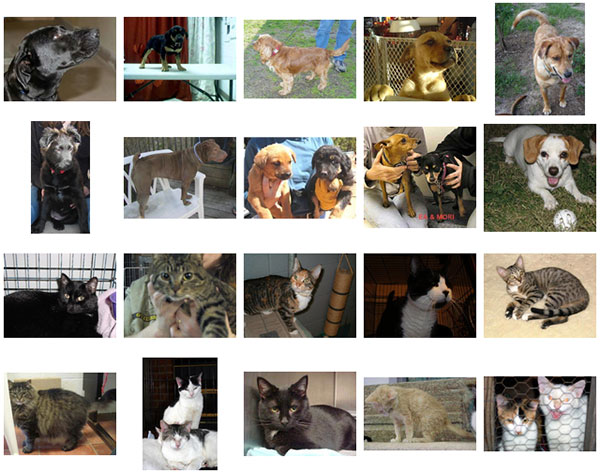

In [0]:
Image(os.path.join(proj_dir, 'keras_input_shape_dataset.jpg'))

In [6]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.pooling import AveragePooling2D
from keras.applications import VGG16
from keras.layers.core import Flatten, Dropout
from keras.layers.core import Dense
from keras.layers import Input
from keras.models import Model, load_model
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import pickle as pkl
import numpy as np
#import argparse
import cv2
import os
%matplotlib inline

Using TensorFlow backend.


In [7]:
import os
data_path = os.path.join(root_dir, 'data/dogs_vs_cats_small')
data_path

'/content/drive/My Drive/Colab Notebooks/data/dogs_vs_cats_small'

In [8]:
#dataset = ./data -> /Volumes/DATA/dogs_vs_cats_small
image_paths = ""
print('[INFO] loading images...')
image_paths = list(paths.list_images(data_path))

[INFO] loading images...


In [0]:
os.listdir(os.path.join(data_path, 'cats'))

['cats_00860.jpg',
 'cats_00128.jpg',
 'cats_00371.jpg',
 'cats_00709.jpg',
 'cats_00292.jpg',
 'cats_00714.jpg',
 'cats_00392.jpg',
 'cats_00621.jpg',
 'cats_00798.jpg',
 'cats_00649.jpg',
 'cats_00885.jpg',
 'cats_00342.jpg',
 'cats_00581.jpg',
 'cats_00345.jpg',
 'cats_00863.jpg',
 'cats_00439.jpg',
 'cats_00856.jpg',
 'cats_00559.jpg',
 'cats_00282.jpg',
 'cats_00830.jpg',
 'cats_00160.jpg',
 'cats_00585.jpg',
 'cats_00493.jpg',
 'cats_00540.jpg',
 'cats_00280.jpg',
 'cats_00578.jpg',
 'cats_00426.jpg',
 'cats_00723.jpg',
 'cats_00950.jpg',
 'cats_00986.jpg',
 'cats_00372.jpg',
 'cats_00413.jpg',
 'cats_00626.jpg',
 'cats_00700.jpg',
 'cats_00664.jpg',
 'cats_00273.jpg',
 'cats_00790.jpg',
 'cats_00334.jpg',
 'cats_00880.jpg',
 'cats_00421.jpg',
 'cats_00479.jpg',
 'cats_00858.jpg',
 'cats_00499.jpg',
 'cats_00697.jpg',
 'cats_00104.jpg',
 'cats_00765.jpg',
 'cats_00601.jpg',
 'cats_00911.jpg',
 'cats_00545.jpg',
 'cats_00989.jpg',
 'cats_00127.jpg',
 'cats_00450.jpg',
 'cats_00731

In [0]:
data = []
labels = []
for image_path in image_paths:
    label =image_path.split(os.path.sep)[-2] #dogs
    
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(128,128))
    
    data.append(image)
    labels.append(label)
    
data = np.array(data)
labels = np.array(labels)

In [0]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = np_utils.to_categorical(labels)

In [0]:
(trainX, testX, trainY, testY) = train_test_split(data, labels,
                                                 test_size=0.25,
                                                 stratify=labels,
                                                 random_state=42)

In [0]:
train_aug= ImageDataGenerator(rotation_range=30,
                             zoom_range=0.15,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.15,
                             horizontal_flip=True,
                             fill_mode='nearest')

In [0]:
val_aug = ImageDataGenerator()

In [0]:
mean = np.array([123.68, 116.779, 103.939], dtype = 'float32')
train_aug.mean = mean
val_aug.mean = mean

In [15]:
base_model = VGG16(weights = 'imagenet', include_top=False,
                  input_tensor = Input(shape=(128,128,3)))

58892288/58889256 [==============================] - 3s 0us/step


In [16]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [0]:
head_model = base_model.output
head_model = AveragePooling2D(pool_size=(4,4))(head_model)
head_model = Flatten(name='flatten')(head_model)
head_model = Dense(128, activation = 'relu')(head_model)
head_model = Dropout(0.5)(head_model)
head_model = Dense(2,activation='softmax')(head_model)

In [0]:
model=()
model = Model(inputs = base_model.inputs, outputs = head_model)

for layer in base_model.layers:
    layer.trainable=False
    
opt = Adam(lr=1e-4)

model.compile(optimizer= opt,loss = 'binary_crossentropy', metrics=['accuracy'])

In [19]:
H = model.fit_generator(train_aug.flow(trainX, trainY, batch_size= 32),
                        steps_per_epoch= len(trainX)//32,
                       validation_data = val_aug.flow(testX, testY),
                        validation_steps= len(testX)//32,
                        epochs = 100
                )
model.save(os.path.join(proj_dir, 'colab-trained100-model.h5'))



Epoch 1/100
46/46 [==============================] - 11s 247ms/step - loss: 5.3172 - accuracy: 0.5170 - val_loss: 2.8114 - val_accuracy: 0.6854
Epoch 2/100
46/46 [==============================] - 6s 126ms/step - loss: 3.8012 - accuracy: 0.6182 - val_loss: 1.0806 - val_accuracy: 0.7949
Epoch 3/100
46/46 [==============================] - 5s 118ms/step - loss: 2.9489 - accuracy: 0.6831 - val_loss: 0.9237 - val_accuracy: 0.8590
Epoch 4/100
46/46 [==============================] - 5s 118ms/step - loss: 2.3935 - accuracy: 0.7418 - val_loss: 0.4625 - val_accuracy: 0.8547
Epoch 5/100
46/46 [==============================] - 5s 114ms/step - loss: 2.1287 - accuracy: 0.7405 - val_loss: 0.5091 - val_accuracy: 0.8910
Epoch 6/100
46/46 [==============================] - 5s 116ms/step - loss: 1.9478 - accuracy: 0.7731 - val_loss: 1.0296 - val_accuracy: 0.8761
Epoch 7/100
46/46 [==============================] - 5s 116ms/step - loss: 1.7598 - accuracy: 0.7719 - val_loss: 0.6706 - val_accuracy: 0.888

In [0]:
import os
with open(os.path.join(proj_dir, 'trained100_history_dic'), 'wb') as hist_file:
  pkl.dump(H.history, hist_file)

In [0]:
#model = load_model(os.path.join(proj_dir, 'colab-trained100-model.h5'))

In [0]:
preds = model.predict(testX,batch_size=32)

In [22]:
print(classification_report(testY.argmax(axis=1),
                          preds.argmax(axis=1),
                          target_names=lb.classes_
                                       )
     )

              precision    recall  f1-score   support

        cats       0.96      0.86      0.91       250
        dogs       0.88      0.96      0.92       250

    accuracy                           0.91       500
   macro avg       0.92      0.91      0.91       500
weighted avg       0.92      0.91      0.91       500



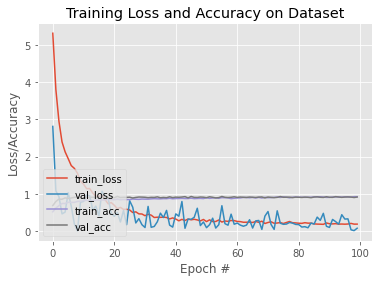

In [24]:
#plot training loss and accuracy
#N=args['epochs']
N=100
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0,N), H.history['loss'], label='train_loss')
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])
plt.savefig(os.path.join(proj_dir, 'colab_training100history.png'))

In [0]:
# model.save('finetuning_model.h5')
# Save the colab fine tuned model

#Saving/loading whole models (architecture + weights + optimizer state)

It is not recommended to use pickle or cPickle to save a Keras model.

You can use model.save(filepath) to save a Keras model into a single HDF5 file which will contain:
the architecture of the model, allowing to re-create the model
the weights of the model
the training configuration (loss, optimizer)
the state of the optimizer, allowing to resume training exactly where you left off.
You can then use keras.models.load_model(filepath) to reinstantiate your model. load_model will also take care of compiling the model using the saved training configuration (unless the model was never compiled in the first place).

#can save only weights
#can save only architecture
#see keras doc
